## Final Project Submission

Please fill out:
* Student name: Hana Kerner 
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Morgan Jones 
* Blog post URL:

insert picture or something of seattle 

# Overview  
***

Talk about the real estate agency here - description.

As // our goal is to help homeowners buy and/or sell homes. With this in mind, our focus is to provide advice to homeowners on how specific renovations may increase the estimated value of their homes, and what dollar value is attached to this. We are looking to gather insights into the historical housing market trends, to be able to provide homeowners with the best possible recommendations.  

Explain King County and why this is our focus 

Specifically, 
Our project will involve analyzing the prices of the King

We have used data from // 

Our method parses through data of //// and includes cleaning, preparing, modeling, and presenting the data using linear regression.

The following analysis will use /// to measure // 

The features and trends that we will be forming recommendations around include:

# Business Problem
***

We are looking to predict the sale price of houses in the King County Housing Market in Washington, USA to create actionable insights for homeowners pertaining to the features of houses that will provide them with the highest financial gain. The homeowners will then be able to use these recommendations when moving forward with where to allocate their time and money with respect to their home renovations. 

**Help homeowners increase the value of their property** 


with analyzing raw real estate data and breaking down the trends of the housing market in King County

The analysis below aims to answer the following questions:

1. **How does number of bedrooms impact the selling price of a home in King County?**

Understanding how the makeup of a house impacts its price will be crucial in being able to aid homeowners with their renovations and advise them with the most successful strategy to increase the value of their property.

2. **How does number of bathrooms impact the selling price of a home in King County?**

Knowing

3. **How does grade impact the selling price of a home in King County?**

Insights into 

4. **How does condition impact the selling price of a home in King County?**


***

These questions are crucial in deciding how we will advise homeowners to move forward, as we will have a better understanding of housing characteristics, and thus, an understanding of what they should focus on to see the greatest possible returns.

# Data Understanding
***

We are working with the King County House Sales dataset. 

Attach dataset and explan it briefly

Our data process will consist of multiple steps. Ultimately, we will be conducting statistical analyses and developing a Linear Regression model to predict the sale price of a King County house. These predictions will allow us to have concrete numbers and values to help homeowners make informed decisions when faced with renovations. 

Our data process will consist of:
***
- Importing and processing the data 
- Cleaning the data (handling missing values, datatypes, duplicates, etc.)
- Describing the data and relationships we may see 
- Fitting models and conducting hypothesis testing
- Gathering insights and interpreting findings 
- Developing conclusions and recommendations 
***

## Import Data
***

Import libraries and standard packages to help us import data and conduct our statistical analyses

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plot outputs 
%matplotlib inline

Use pandas function `.read_csv` to open up the comma separated values file from our data folder 

In [2]:
# Use data folder path to import and read dataset
df = pd.read_csv('data/kc_house_data.csv')

# Preview data 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Our data is imported as a dataframe under the `df` variable name. We can now dig deeper into the entries to get a better idea of what we are working with.

## Column Names and Descriptions for King County Data Set
***
We have been provided with information pertaining to each column of our dataset. Below consists of the descriptions that we have been given.

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors
***

## Clean Data

Here we will handle missing and duplicated values as well as any datatypes that may need changing. We will also have the opportunity to adjust the data as we see fit so that it can be as concise and simple as possible for moving forward with our analyses. 

First let's take a closer look at the data as a whole. We can use the `.info()` method to get a greater sense of the overall data structure, the datatypes, and potential missing values.

In [3]:
# Use info method 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There is a lot we can take from this. We see all the column names and value counts for each of these columns. We can see that we have 21,597 rows and 21 columns. We also see there are some missing values in the `waterfront`, `view`, and `yr_renovated` columns. We also notice that we may need to alter some of the datatypes. 

We can use `.describe()` to look a little closer at the statistical values of our numeric columns

In [4]:
# Use describe method

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can check the null values using `'.isnull()`. We saw we had missing values and this will just return `True` or `False`, confirming that. 

In [5]:
# Use .isnull() with .any to check overall dataset by column 

df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

This is what we saw before. Looking closer, we know that in answering our questions we do not actually need to use the data from the `waterfront` or `view` categories, as these features will not be used for our renovation recommendations. We can drop both of these columns. `yr_renovated` may still be useful to us, so we will look at what proportion of the data we are missing and decide how to move forward with that column.

In [6]:
# Use .drop() to drop renovation and view columns 
# Use axis = 1 to specify that we are dropping columns 

df = df.drop(['waterfront', 'view'], axis=1)

In [7]:
# Check that this worked 

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Now that we dropped those columns, we can look into the `yr_renovated` a bit closer.

In [8]:
# Sum the count of null values in the specified column 
# Divide this number by the amount of rows in the dataset
# Multiply by 100 to get a percentage of missing values 

renovated_missing = (df['yr_renovated'].isnull().sum() / len(df)) * 100
renovated_missing

17.78950780200954

We are missing around 18% of the values in this column, which is a lot. We do not want to drop nearly 20% of our dataset so we want to see what other method we can use to fill the null values in the `yr_renovated` column. If we look at our statistical data from using the `.describe()` function, we can see that the `mean` year renovated is `86.64` which does not make much sense. Our `median` is listed as `0` which also does not help us. Next, we may consider using the `mode`. 

In [9]:
# Use .mode() to find the most common value in the yr_renovated column 

df['yr_renovated'].mode()

0    0.0
dtype: float64

If we think about this, we now see that both our `median` and `mode` for this column is zero. The zero most likely indicates that the homes with these entries in the `yr_renovated` column have not been renovated. This also explains why our `mean` was not in the format of a year. With this understanding, the safest decision may be to fill in the null values with a `0` as well, indicating the homes have not been renovated. We can do this below.

In [10]:
# Use .fillna() function to replace missing values with zero 
# Use inplace = True to replace values on our df dataframe 

df['yr_renovated'].fillna(0, inplace=True)

In [11]:
# Use .info() to check that this worked with the Non-Null Content 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

Now that we have dealt with the null values we can look deeper into the datatypes. Immediately `sqft_basement` stands out as its listed as an `object` rather than `int` like `sqft_above` is. We can look closer at the column below using `.head()`. We also may want to change `yr_renovated` to an `int` rather than `float`, as this column lists years. We can do this first using `.astype('int64')`. Before moving on, we should look closer at the datatypes to see if any of our columns actually have categorical data rather than `int` or `float`. We see that `date`, `grade`, and `condition` are listed as objects which is fine. That being said, although we may not use it in our analysis, we can change a column like `zipcode` to `object` using the same `.astype('object')` function.

In [12]:
# Use .astype() to change yr_renovated to int64

df['yr_renovated'] = df['yr_renovated'].astype('int64')

In [13]:
# Use .astype() to change zipcode column to object 

df['zipcode'] = df['zipcode'].astype('object')

In [14]:
# Check to see this worked 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  object 
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

Now we can look into the `sqft_basement` column.

In [15]:
# Look into the sqft_basement column 

df['sqft_basement'].head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object

We can see that there is an entry that has `?` as a value, which is not something we want in our data. Before changing the datatype of this column, let's check all columns for placeholder values that may be similar to `?`. We only have a few object columns, so hopefully this will not be an issue.

In [16]:
# Use .isin() and .any() to check each column for specified list of values 

df.isin(['?', 'None', 'null', 'N/A', 'NaN', '/']).any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
condition        False
grade            False
sqft_above       False
sqft_basement     True
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

It looks like our other columns are ok, so we will continue to focus on the `sqft_basement` column for now.

In [17]:
# Look into unique values in the sqft_basement column 

df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

Although that is a long list, if we look through it, the `?` looks to be our only issue. Since this column is not an `int` or `float` column we do not have statistical data from the `.describe()` function above. Instead, let's look to see the `mode` of the data like we did for the `yr_renovated` column.

In [18]:
# Use .mode() for the sqft_renovated column 

df['sqft_basement'].mode()

0    0.0
dtype: object

Again, this value is zero. This may indicate that the majority of houses in our dataset do not have basements, or do not have data on those basements. Because of that, we can be comfortable using `0` as our mode and value to replace the `?` values with. 

In [19]:
# Use .replace() to replace 0 with ?
# Use inplace = True again to keep these new changes

df['sqft_basement'].replace('?', '0', inplace=True)

In [20]:
# Check that this worked

df['sqft_basement'].head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         0
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object

Now we can change the datatype to float using `.astype(float)`

In [21]:
# Change datatype 

df['sqft_basement'] = df['sqft_basement'].astype(float)

In [22]:
# Check that this worked using .info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  object 
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

That covers missing values, placeholder values, and datatype. Now we can use `.duplicated()` to check our data for duplicates. 

In [33]:
# Use .duplicated() and .any() to see if there are duplicates by column 

df.duplicated().any()

False

We do not have any duplicates. Now, we can use our cleaned data to comfortably move onto looking deeper into the distributions, relationships, and patterns we may find. 
***

## Describe and Prepare Data 
***

We will use visualizations and statistical testing to gain insights about our data. This step will help us gain knowledge for how we can best move forward and be of service to homeowners in as accurate a way as possible. 

To best prepare our data for modeling we will:

Add more descriptions and explanations here

So far, our data looks good after being cleaned. We know that we were dealing with a few categorical variables, and there may be other categorical variables that we did not catch earlier while simply cleaning the data. Let's check the number of unique values in each column to see if some columns only have a few unique values, which may indicate that the column should actually be a categorical variable rather than numeric. We can use `.nunique()` to do this.

In [25]:
# Check each column to see the number of unique values

df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

The columns `floors`, `condition`, and `grade` stand out here. We know that `condition` and `grade` are already categorical variables, but `floors` is listed as a `float`. Let's look a bit into each one, especially since these are values that we know we may want to use in our models. We know that a linear regression model will not properly represent these values unless they are numeric. We know we may need to convert these values into ones that our model will be able to process and interpret.

We can quickly create a few scatterplots to look at the data in these columns closer through the visualization.

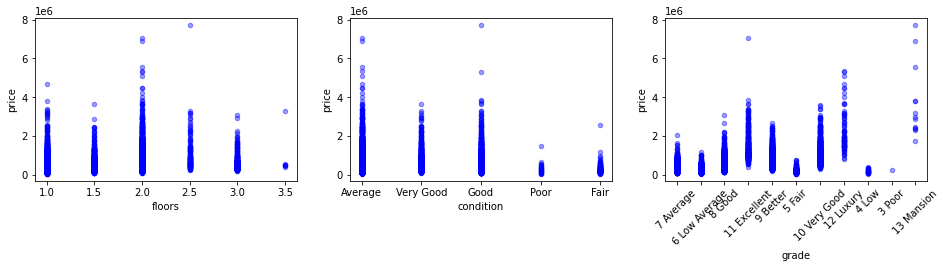

In [31]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

# Use for loop to loop through the three columns we want to see in the scatterplots below 
for col, ax in zip([ 'floors', 'condition', 'grade'], axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')
    plt.xticks(rotation = 45)

This further validates what we thought. The vertical lines suggest that we are working with categories. We already know that `condition` and `grade` are categorical variables that we may need to convert into numerical values so that our models can make sense of them. `floors` appears not to represent a continuous number, either, and may need to be treated as a category as well.

### Transforming Categorical Variables
***

We know when we need to transform a categorical variable for regression models, there are two approaches:
1) Perform label encoding<br>
2) Create dummy variables / one-hot-encoding

Label encoding consists of converting each value in a column to a number. This is one method for transforming a categorical variable into a numeric one so that our models can make sense of the values in the column. That being said, we will create dummy variables below. The advantage of this is that our numerical values cannot be misinterpreted as being continuous. We know one-hot-encoding is required when adding categorical variables in a regression model. One thing to be mindful of is the dummy variable trap where one variable can be predicted from all of this others. This would result in multicollinearity which is an issue in regression. We will avoid this trap by dropping one of the dummy variables by passing `drop_first = True` to our function `get_dummies()` from the `pandas` library.

In [26]:
# Look into floors

df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [34]:
# Look into condition 

df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [35]:
# Look into grade

df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

We now have a better idea of the values that we will transform into dummy variables. We will create a list below to go through our three columns of interest. By using `pd.get_dummies()`, from each original column, each category will be converted into a new column, assigning a 1 or 0 to each new column. 

In [36]:
# Create a list that we can pass through the pd.get_dummies() function 

cats = ['floors', 'condition', 'grade']

We will create a new dataframe with our dummy columns, rather than dropping the original columns and then concatenating the new dummy columns.

In [37]:
# Use pd.get_dummies() to create a new dataframe with the dummy columns 

df_dum = pd.get_dummies(data= df, columns= cats, drop_first = True)

In [38]:
# Check that this worked 

df_dum.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1180,0.0,1955,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2170,400.0,1951,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,770,0.0,1933,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1050,910.0,1965,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1680,0.0,1987,...,0,0,0,0,0,0,0,0,1,0


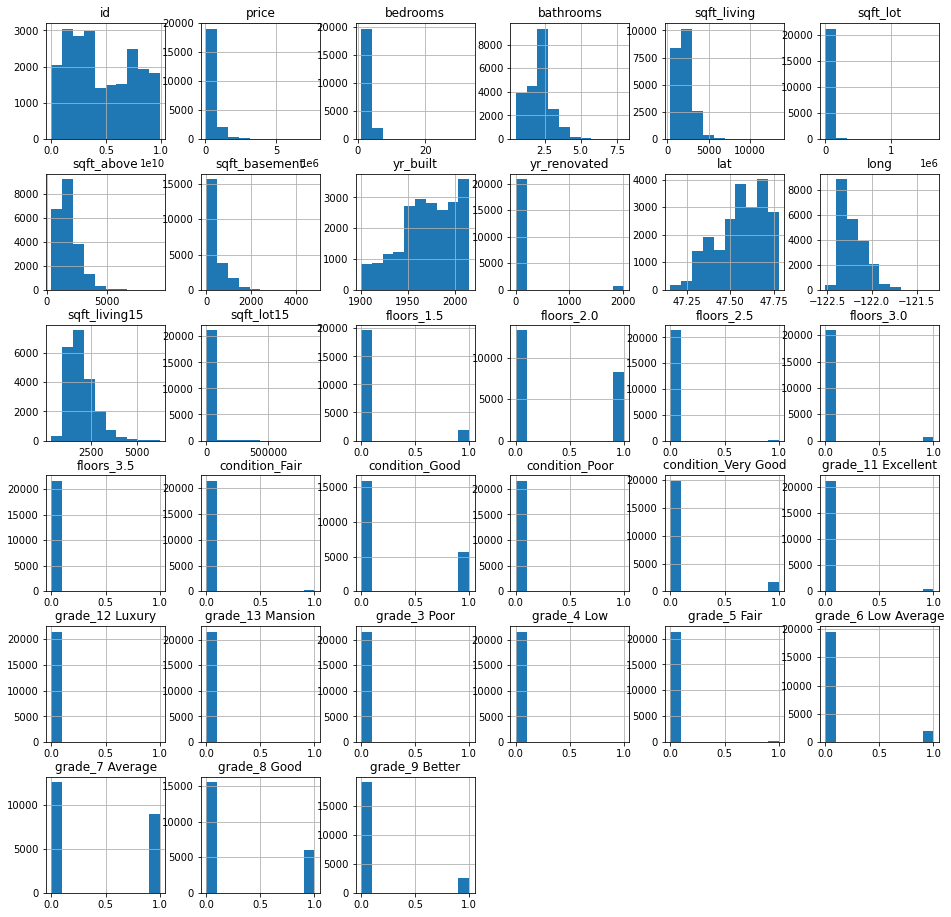

In [59]:
# Look at overview of histograms 

df_dum.hist(figsize=(16,16));

We can clearly see the dummy variables here, where many of our histograms are split between values of 0 and values of 1. We can be comfortable moving on from transforming categorical variables and begin to look into feature engineering.

### Feature Engineering

# Modeling 
***

# Regression Results
***

# Conclusion 
***

In [ ]:
# Your code here - remember to use markdown cells for comments as well!